<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ams182/blob/main/segundo%20curso/assignment03_A01104775.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Resumen de actividades semana 6

# Alejandro Munguia Salazar A01104775

# Data Analysis with Python (IBM) 
# Mod 3

****************
Análisis exploratorio
****************

Revisar las características de los datos, entender mejor los datos, revisar relaciones de variables, extraer las variables mas importantes

en el ejemplo, que variables impactan mas en el precio del auto?



***************
Estadísticas descriptivas:

resumen de variables. pd.describe() pd.value_counts()

las graficas de caja para ver media, comprar preferencia, intercuartiles y la de puntos para ver la relación entre 2 variables.

****************
Group by

pd.groupby() pd.pivot()

tablas dinamicas en excel

heat maps para verlos de manera grafica


*****************
ANOVA (analisis de varianza)


¿que variable tiene mas y menor impacto?

ANOVA puede usarse para encontrar la correlacion entre diferentes grupos de variables categóricas.

en el ejemplo: se usa para ver la diferencia de el precio promedio de dos fabricantes

1.- F-test: calcula la proporción de la variación entre la media de los grupos sobre la variación
dentro de cada uno de los grupos de la muestra.

2.- El valor p: muestra si el resultado obtenido es estadísticamente significativo.

Existe una fuerte correlación entre una variable categórica y otras variables, si la prueba ANOVA nos da un valor F grande y un valor p pequeño.



en el ejemplo: 


    Los precios entre Hondas y Subarus no son significativamente diferentes, ya que la prueba F
    es inferior a 1 y el valor p es superior a 0.05.
    Podemos hacer lo mismo con Honda y Jaguar.
    Los precios entre Hondas y Jaguars son significativamente diferentes, ya que la puntuación F es muy grande (F = 401) y el valor p es superior a 0,05.

***************
Correlation

mide hasta qué punto diferentes variables son interdependientes o están relacionadas (sin causalidad).
si una de ellas cambia, ¿Cómo afecta este cambio a la otra variable?

ej; tabaquismo está correlacionado con el cáncer de pulmón, ya que hay más probabilidades de contraerlo si se fuma.
de padecer cáncer de pulmón si se fuma.

en el ejemplo:

correlación entre el tamaño del motor y el precio con un gráfico de dispersión y una línea lineal añadida
llamada "línea de regresión", que indica la relación entre ambas. la línea recta que pasa por los puntos de datos es muy pronunciada,
lo que demuestra que existe una relación lineal positiva entre las dos variables.
Con el aumento de los valores del tamaño del motor, los valores del precio también suben y la pendiente de la
es positiva, por lo que existe una correlación positiva entre el "tamaño del motor" y el "precio".

se usa seaborn regplot() para crear el gráfico de dispersión.

relación entre las millas por galón de la carretera
cuando el valor de las millas por galón sube, el valor del precio baja, existe una relación lineal negativa entre el kilometraje en carretera y el precio.
Aunque esta relación es negativa, la pendiente de la línea es pronunciada, lo que significa que

Por último, tenemos un ejemplo de correlación débil, anto las rpm máximas bajas
como los valores altos de rpm máximas tienen precios bajos y altos, por lo tanto, 

No podemos utilizar las RPM para predecir los valores.


Una forma de medir la fuerza de la correlación entre variables numéricas continuas es con la Correlación de Pearson.
da como resultado el coeficiente de correlación y el valor p.


coeficiente de correlación:

un valor cercano a 1 implica una gran correlación positiva, mientras que un valor cercano a -1 implica una gran correlación negativa y un valor cercano a 0 implica que no hay correlación 

valor p, un valor inferior a 0,001 nos da una gran certeza sobre el coeficiente de correlación
entre 0,001 y 0,05 nos da una certeza moderada, 
entre 0,05 y 0,1 nos nos da una certeza débil
p mayor que 0,1 nos dará ninguna certeza de la correlación
en absoluto.


se usa Scipy.

para el ejemplo queremos ver la correlación entre las variables "potencia" y el "precio" del coche.: 

Podemos ver que el coeficiente de correlación es de aproximadamente 0,8, y esto se acerca a
1, por lo que existe una fuerte correlación positiva.

También podemos ver que el valor p es muy pequeño, mucho menor que 0,001, por lo que podemos concluir
que estamos seguros de esta fuerte correlación positiva.

Teniendo en cuenta todas las variables, ahora podemos crear un mapa de calor que indique la correlación
entre cada una de las variables.

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline 

In [3]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)

In [4]:
# veamos que tipos de variables son:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [5]:
#la correlacion entre type "int64" or "float64" usando el metodo "corr":

df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [6]:
#para solo algunas columnas:

df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


******
Variables numéricas continuas:

Las variables numéricas de tipo "int64" o "float64". Una buena manera de visualizar estas variables es utilizando gráficos de dispersión con líneas ajustadas.

Para empezar a entender la relación (lineal) entre una variable individual y el precio, podemos utilizar "regplot" que traza el gráfico de dispersión más la línea de regresión ajustada para los datos.

ejemplo: "tamaño del motor" y "precio".

(0.0, 53437.22127896102)

             engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000


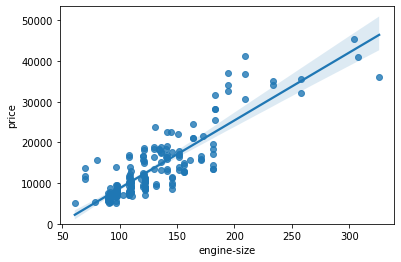

In [7]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
print(plt.ylim(0,))
print('')
print(df[["engine-size", "price"]].corr())

#A medida que aumenta el tamaño del motor, aumenta el precio: correlación positiva entre estas dos variables y por lo tanto ek tamaño del motor parece un buen predictor del precio, 
#ya que la línea de regresión es casi una línea diagonal perfecta.

#correlación entre "tamaño del motor" y "precio" y ver que es de aproximadamente 0,87.


(0.0, 48189.527470306566)



,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


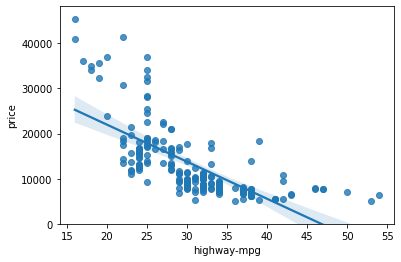

In [8]:
#ahora con "highway-mpg" and "price".

sns.regplot(x="highway-mpg", y="price", data=df)
print(plt.ylim(0,))
print('')
df[['highway-mpg', 'price']].corr()

#si highway-mpg aumenta el precio disminuye: relación inversa/negativa entre estas dos variables y El highway-mpg podría ser un predictor del precio.
# la correlación entre "mpg en carretera" y "precio" y ver que es de aproximadamente -0,704.


ejemplo de variable sin correlación  "peak-rpm" y "price":
sns.regplot(x="peak-rpm", y="price", data=df)
df[['peak-rpm','price']].corr()

no sería un buen predictor y su correlación muy baja

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


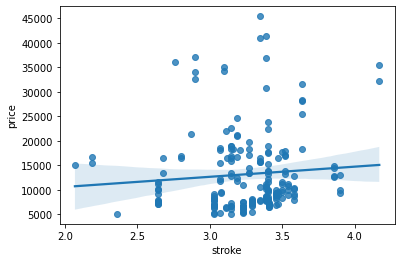

In [9]:
# entre x="stroke", y="price"
sns.regplot(x="stroke", y="price", data=df)
df[["stroke","price"]].corr()

#mal predictor, correlación baja

********
Variables categóricas

describen una "característica" pueden tener el tipo "objeto" o "int64". Una buena forma de visualizar las variables categóricas es utilizando boxplots.
Veamos la relación entre "estilo de carrocería" y "precio".

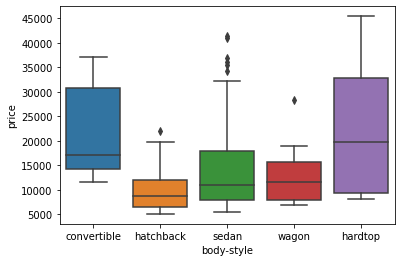

In [10]:
#la relación entre "estilo de carrocería" y "precio".
sns.boxplot(x="body-style", y="price", data=df)

#Vemos que las distribuciones de precios entre las distintas categorías de "body-style" se solapan de forma significativa, por lo que NO sería un buen predictor del precio. 

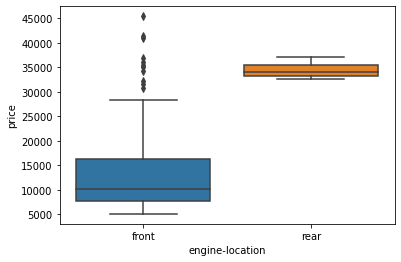

In [11]:
#la relación entre ""engine-location"" y "precio".
sns.boxplot(x="engine-location", y="price", data=df)

#Aquí vemos que la distribución del precio entre estas dos son lo suficientemente distintas entonces un buen predictor potencial del precio.

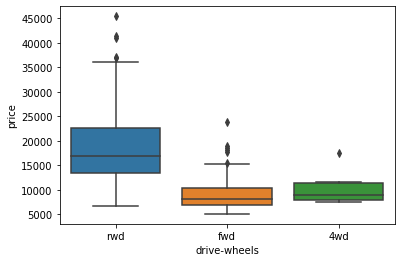

In [12]:
# Entre "drive-wheels" and "price".
sns.boxplot(x="drive-wheels", y="price", data=df)

# podría ser una bueba variable

*********
3. Descriptive Statistical Analysis

In [13]:
print(df.describe() ) # variables numericas

print('')
print('')
print('')

print(df.describe(include=['object'])) #variables obj

        symboling  normalized-losses  wheel-base      length       width  \
count  201.000000          201.00000  201.000000  201.000000  201.000000   
mean     0.840796          122.00000   98.797015    0.837102    0.915126   
std      1.254802           31.99625    6.066366    0.059213    0.029187   
min     -2.000000           65.00000   86.600000    0.678039    0.837500   
25%      0.000000          101.00000   94.500000    0.801538    0.890278   
50%      1.000000          122.00000   97.000000    0.832292    0.909722   
75%      2.000000          137.00000  102.400000    0.881788    0.925000   
max      3.000000          256.00000  120.900000    1.000000    1.000000   

           height  curb-weight  engine-size        bore      stroke  \
count  201.000000   201.000000   201.000000  201.000000  197.000000   
mean    53.766667  2555.666667   126.875622    3.330692    3.256904   
std      2.447822   517.296727    41.546834    0.268072    0.319256   
min     47.800000  1488.000000 

In [14]:
# Conteo de variables:
df['drive-wheels'].value_counts()  ##solo aplica en series 
df['drive-wheels'].value_counts().to_frame() # aqui se hace df"


,drive-wheels
fwd,118
rwd,75
4wd,8


In [15]:
# ahora con drive_wheels_counts

drive_wheels_counts = df['drive-wheels'].value_counts().to_frame() 
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True) #para facilidad se renombre
drive_wheels_counts.index.name = 'drive-wheels' # para facilidad se nombra el indice
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [16]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


**********
4. Basics of Grouping


In [17]:
# valores unicos de la variable
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [18]:
# creando un df con solo esas variables
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [19]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [20]:
# resultados
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [21]:
# como tabla dinámica
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [22]:
# eliminando los nan
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [23]:
#grup by body style usando la media 

df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


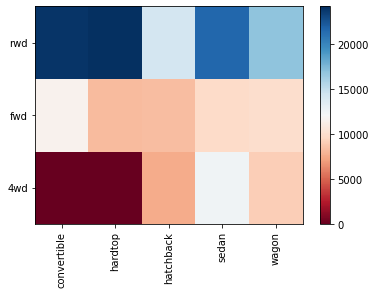

In [24]:
# Drive Wheels and Body Style vs. Price

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()


**********
5. Correlación y causalidad
**********



Correlación: grado de interdependencia (relación, que tanto cambia una variable cuando otra cambia) entre las variables.

Causación-causalidad: causa y efecto entre dos variables.


La correlación no implica causalidad. La causalidad puede requerir una experimentación independiente.


*******
P-value

Es el valor de la probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. 

Normalmente, elegimos un nivel de significación de 0,05, lo que significa que tenemos un 95% de confianza en que la correlación entre las variables es significativa.


1.- p-value is < 0.001: es significativa

2.- the p-value is < 0.05: moderadamente significativa

3.- the p-value is < 0.1: pobremente significativa

4.- the p-value is > 0.1: no es significativa.


Podemos obtener esta información utilizando el módulo "stats" de la biblioteca "scipy".

In [25]:
# por ejemplo Wheel-Base vs. Price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)   

# Horsepower vs. Price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

# Length vs. Price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  


# Width vs. Price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

# Curb-Weight vs. Price
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

# Engine-Size vs. Price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

# Bore vs. Price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

# City-mpg vs. Price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

# Highway-mpg vs. Price
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 



The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P =  8.076488270733218e-20
The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428260101e-48
The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P =  8.016477466159556e-30
The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38
The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53
The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64
The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17
The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29
The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


*********
ANOVA

El análisis de la varianza (ANOVA) es un método estadístico utilizado para comprobar si existen diferencias significativas entre las medias de dos o más grupos. El ANOVA devuelve dos parámetros:

Prueba F: El ANOVA supone que las medias de todos los grupos son iguales, calcula la desviación de las medias reales con respecto a la suposición, y la comunica como puntuación de la prueba F. Una puntuación mayor significa que hay una mayor diferencia entre las medias.

Valor P: El valor P indica lo estadísticamente significativo que es nuestro valor de puntuación calculado.

Si nuestra variable de precio está fuertemente correlacionada con la variable que estamos analizando, esperamos que el ANOVA devuelva una puntuación de prueba F considerable y un valor p pequeño.

In [26]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [27]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [28]:
# ANOVA

#'drive-wheels' impact 'price'
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   


#fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val )

#4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)  

#4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23
ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23
ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333
ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


Las mejores variables:

Continuous numerical variables:

    Length
    Width
    Curb-weight
    Engine-size
    Horsepower
    City-mpg
    Highway-mpg
    Wheel-base
    Bore

Categorical variables:

    Drive-wheels
